In [146]:
import pandas as pd
import requests
from datetime import datetime

r = requests.get("https://api.covidtracking.com/v1/states/daily.json").json()

In [147]:
df = pd.DataFrame(r)

In [148]:
df.columns

Index(['date', 'state', 'positive', 'probableCases', 'negative', 'pending',
       'totalTestResultsSource', 'totalTestResults', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'lastUpdateEt', 'dateModified', 'checkTimeEt', 'death', 'hospitalized',
       'hospitalizedDischarged', 'dateChecked', 'totalTestsViral',
       'positiveTestsViral', 'negativeTestsViral', 'positiveCasesViral',
       'deathConfirmed', 'deathProbable', 'totalTestEncountersViral',
       'totalTestsPeopleViral', 'totalTestsAntibody', 'positiveTestsAntibody',
       'negativeTestsAntibody', 'totalTestsPeopleAntibody',
       'positiveTestsPeopleAntibody', 'negativeTestsPeopleAntibody',
       'totalTestsPeopleAntigen', 'positiveTestsPeopleAntigen',
       'totalTestsAntigen', 'positiveTestsAntigen', 'fips', 'positiveIncrease',
       'negativeIncrease', 'total', 'totalTestResultsIncrease', 

In [149]:
df

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,None,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,
1,20210307,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,None,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,
2,20210307,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,None,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,
3,20210307,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,None,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,
4,20210307,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,None,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20775,20200117,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,...,None,0,0,7cefac6b3681020741ca30f45399a7b22f2e45b4,0,0,0,0,0,
20776,20200116,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,...,None,0,0,650501e005a5ee86d93c5f32dda56735ea2af967,0,0,0,0,0,
20777,20200115,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,...,None,0,0,4987e61aad88182abfe641033b597304c2153d4f,0,0,0,0,0,
20778,20200114,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,...,None,0,0,1881c8a2f0d337b22066b4f05df06eb2259e8d57,0,0,0,0,0,


In [150]:
df = df[["date", "state", "positive"]]
df

,date,state,positive
0,20210307,AK,56886.0
1,20210307,AL,499819.0
2,20210307,AR,324818.0
3,20210307,AS,0.0
4,20210307,AZ,826454.0
...,...,...,...
20775,20200117,WA,0.0
20776,20200116,WA,0.0
20777,20200115,WA,0.0
20778,20200114,WA,0.0


In [151]:
df = df.dropna(subset = ["positive"])
df

,date,state,positive
0,20210307,AK,56886.0
1,20210307,AL,499819.0
2,20210307,AR,324818.0
3,20210307,AS,0.0
4,20210307,AZ,826454.0
...,...,...,...
20774,20200118,WA,0.0
20775,20200117,WA,0.0
20776,20200116,WA,0.0
20777,20200115,WA,0.0


In [152]:
df["date"] = df["date"].apply(lambda x : datetime.strptime(str(x), "%Y%m%d"))
df

C:\Users\lukpr\AppData\Local\Temp\ipykernel_18044\3343410808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = df["date"].apply(lambda x : datetime.strptime(str(x), "%Y%m%d"))


,date,state,positive
0,2021-03-07,AK,56886.0
1,2021-03-07,AL,499819.0
2,2021-03-07,AR,324818.0
3,2021-03-07,AS,0.0
4,2021-03-07,AZ,826454.0
...,...,...,...
20774,2020-01-18,WA,0.0
20775,2020-01-17,WA,0.0
20776,2020-01-16,WA,0.0
20777,2020-01-15,WA,0.0


In [153]:
table = pd.pivot_table(df, values = "positive", index = "date", columns = "state")
table

state,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
date,,,,,,,,,,,,,,,,,,,,,
2020-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2020-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2020-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2020-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-03,56605.0,497154.0,323353.0,0.0,819954.0,3484963.0,431670.0,283622.0,40818.0,87425.0,...,777935.0,2663414.0,372708.0,580108.0,2695.0,15487.0,341441.0,619087.0,132416.0,54616.0
2021-03-04,56745.0,498076.0,323756.0,0.0,821108.0,3488467.0,433021.0,284500.0,41014.0,87643.0,...,779449.0,2671442.0,372708.0,581408.0,2704.0,15686.0,342236.0,619942.0,132677.0,54685.0
2021-03-05,56886.0,498887.0,324326.0,0.0,823384.0,3493126.0,434654.0,285330.0,41122.0,87874.0,...,780894.0,2678295.0,373868.0,583060.0,2714.0,15819.0,343090.0,620663.0,132964.0,54764.0


<Axes: xlabel='date'>

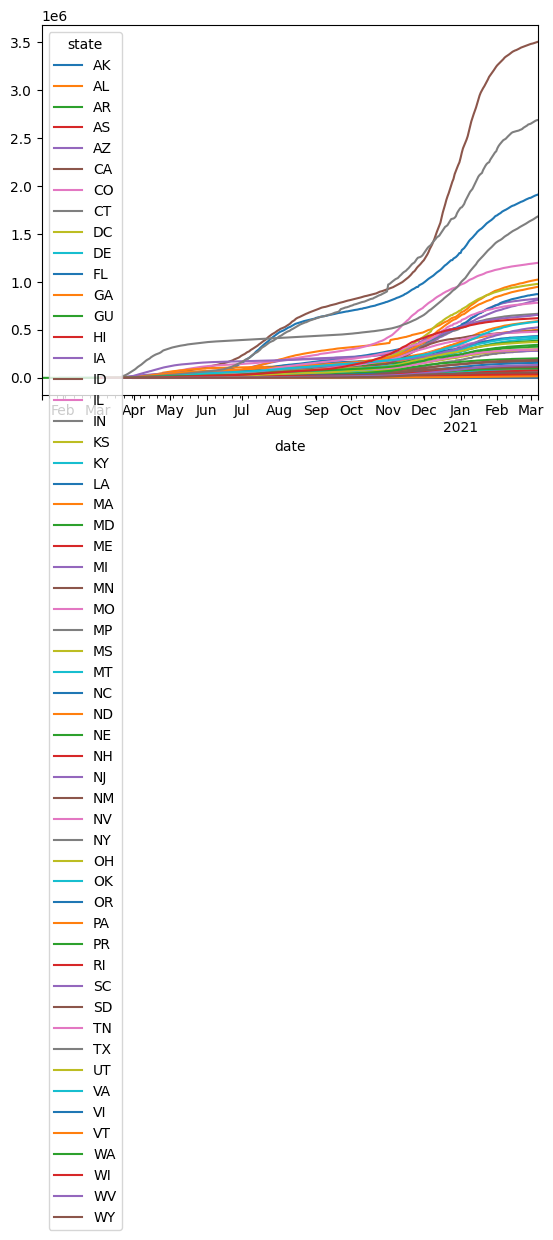

In [154]:
table.plot()

In [155]:
df

,date,state,positive
0,2021-03-07,AK,56886.0
1,2021-03-07,AL,499819.0
2,2021-03-07,AR,324818.0
3,2021-03-07,AS,0.0
4,2021-03-07,AZ,826454.0
...,...,...,...
20774,2020-01-18,WA,0.0
20775,2020-01-17,WA,0.0
20776,2020-01-16,WA,0.0
20777,2020-01-15,WA,0.0


In [156]:
df = df.set_index(["state", "date"])